# Basic Time Series Metrics & Resampling
> A Summary of lecture "Manipulating Time Series Data in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Compare time series growth rates
- Comparing stock performance
    - Stock price series: hard to compare at difference levels
    - Simple solution: normalize price series to start at 100
    - Divide all prices by first in series, multiply by 100
        - Same starting point
        - All prices relative to starting point
        - Difference to starting point in percentage points

### Compare the performance of several asset classes
You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


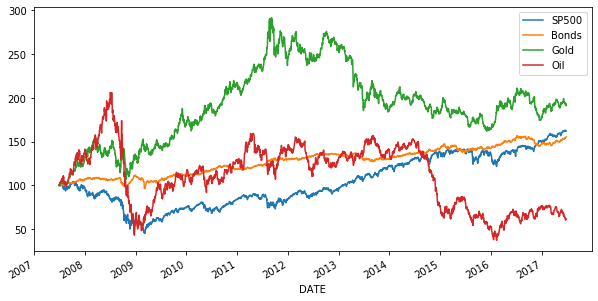

In [3]:
# Import data here
prices = pd.read_csv('./dataset/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Slect first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices) * 100

# Plot normalized
normalized.plot();

### Comparing stock prices with a benchmark
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

| Company  | Stock Ticker |
| ------------- | ------------- |
| Johnson & Johnson	  | JNJ  |
| Exxon Mobil	  | XOM |
| JP Morgan Chase		  | JPM |


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


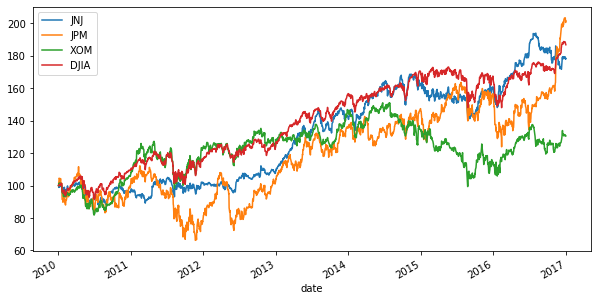

In [7]:
# Import stock prices and index here
stocks = pd.read_csv('./dataset/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('./dataset/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
first_value = data.iloc[0]
normalized = data.div(first_value).mul(100).plot();

### Plot performance difference vs benchmark index
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

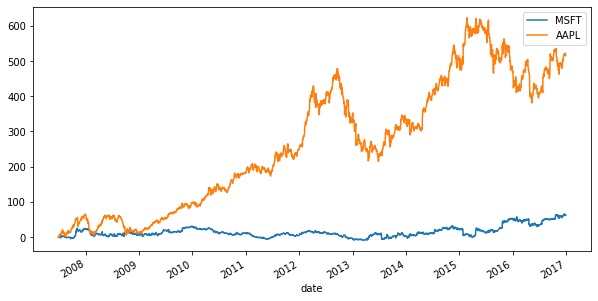

In [8]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('./dataset/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('./dataset/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot();

## Changing the time series frequency: resampling


### Convert monthly to weekly data
You have learned in the video how to use ```.reindex()``` to conform an existing time series to a ```DateTimeIndex``` at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [13]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly unemployment data
The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


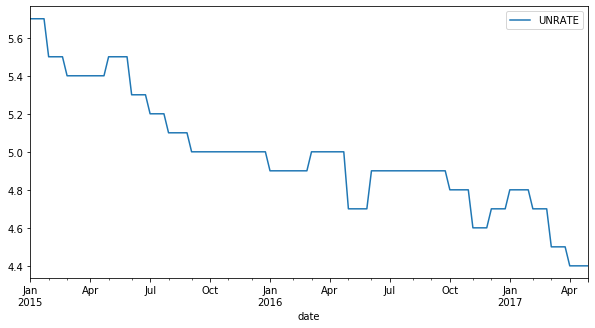

In [15]:
# Import data here
data = pd.read_csv('./dataset/unrate_2000.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly seres with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head(5))

# Plot weekly_fill starting 2015 here
weekly_ffill.loc['2015':].plot()

## Upsampling & interpolation with .resample()
